In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster
from sklearn import decomposition

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Mounted at /gdrive
/gdrive


In [7]:
#Read files
datafile = r'/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 3/three_col.csv'
df = pd.read_csv(datafile) #creates a dataframe
df.head()

,income,age,days_since_purchase
0,56432,31,492
1,137580,38,551
2,68285,59,304
3,93617,51,507
4,113441,54,509


Standardize the three columns and save the names of the standardizes columns in a list

In [9]:
df['z_income'] = (df['income'] - df['income'].mean())/df['income'].std()

In [12]:
df['z_age'] = (df['age'] - df['age'].mean())/df['age'].std()

In [13]:
df['z_days_since_purchase'] = (df['days_since_purchase'] - df['days_since_purchase'].mean())/df['days_since_purchase'].std()

Other option: use a for loop that standardizes them all instead of one at a time


```
cols = df.columns
zcols = []
for col in cols:
    df['z_' + col] = (df[col] - df[col].mean())/df[col].std()
    zcols.append('z_' + col)
```



In [14]:
df.head()

,income,age,days_since_purchase,z_income,z_days_since_purchase,z_age
0,56432,31,492,-0.606833,0.818321,-0.748848
1,137580,38,551,1.505879,1.349109,-0.135469
2,68285,59,304,-0.298237,-0.873001,1.704668
3,93617,51,507,0.361289,0.953267,1.003663
4,113441,54,509,0.877413,0.971260,1.266540


Perform k-means clustering

In [18]:
model = cluster.KMeans(n_clusters=4, random_state=10)
model.fit(df[['z_income', 'z_age', 'z_days_since_purchase']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [19]:
df['cluster'] = model.labels_
df.head()

,income,age,days_since_purchase,z_income,z_days_since_purchase,z_age,cluster
0,56432,31,492,-0.606833,0.818321,-0.748848,3
1,137580,38,551,1.505879,1.349109,-0.135469,2
2,68285,59,304,-0.298237,-0.873001,1.704668,1
3,93617,51,507,0.361289,0.953267,1.003663,2
4,113441,54,509,0.877413,0.971260,1.266540,2


Perform PCA 

In [20]:
#define a PCA object with n_components set to 2
pca = decomposition.PCA(n_components=2)

#use this PCA oject to transform the standardized data and store the transformed dimensions in pc1 and pc2
df['pc1'], df['pc2'] = zip(*pca.fit_transform(df[['z_income', 'z_age', 'z_days_since_purchase']]))

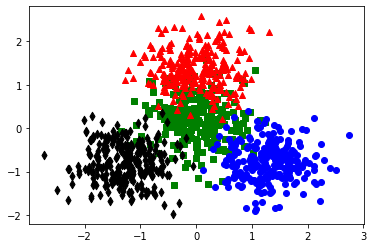

In [22]:
#plot the clusters in the reduced deimnsionality space 
colors = ['r', 'b', 'k', 'g'] 
markers = ['^', 'o', 'd', 's']

for c in df['cluster'].unique():
  d = df[df['cluster'] == c]
  plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])

In [25]:
#look at the means of the variables of each cluster to see what the cluster is capturing
for cluster in df['cluster'].unique():
    print("Cluster: " + str(cluster))
    for col in ['income', 'age', 'days_since_purchase']:
        print(col + ": {:.2f}".format(df.loc[df['cluster'] == cluster, col].mean()))

Cluster: 3
income: 46153.20
age: 29.34
days_since_purchase: 498.19
Cluster: 2
income: 113118.22
age: 49.77
days_since_purchase: 502.58
Cluster: 1
income: 45002.10
age: 49.49
days_since_purchase: 299.66
Cluster: 0
income: 114704.12
age: 29.34
days_since_purchase: 302.92


Export to Excel

In [28]:
df.to_csv('/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 3/clustering13.csv')

Excel Pivot Table

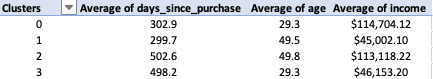

Cluster characteristics: 


*   Younger, lower income, higher days since purchase - Cluster 3
*   Younger, higher income, lower days since purchase - Cluster 0
*   Older, lower income, lower days since purchase - Cluster 1
*   Older, higher income, higher days since purchase - Cluster 2

